<a href="https://colab.research.google.com/github/Upender12/Assignment8_Neural/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
47/47 [==============================] - 4s 10ms/step - loss: 0.5726 - accuracy: 0.0017 - val_loss: 0.4641 - val_accuracy: 0.0030
Epoch 2/5
47/47 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.0033 - val_loss: 0.3973 - val_accuracy: 0.0050
Epoch 3/5
47/47 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.0068 - val_loss: 0.3730 - val_accuracy: 0.0080
Epoch 4/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3603 - accuracy: 0.0082 - val_loss: 0.3559 - val_accuracy: 0.0070
Epoch 5/5
47/47 [==============================] - 0s 5ms/step - loss: 0.3455 - accuracy: 0.0092 - val_loss: 0.3438 - val_accuracy: 0.0110


In [7]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

32/32 [==============================] - 0s 3ms/step


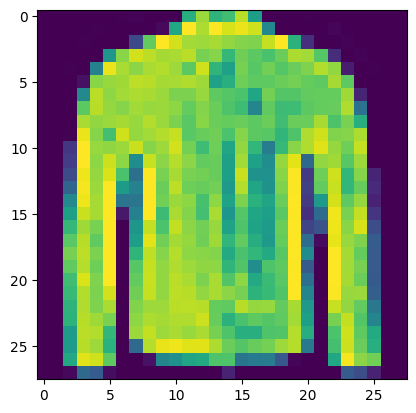

In [8]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

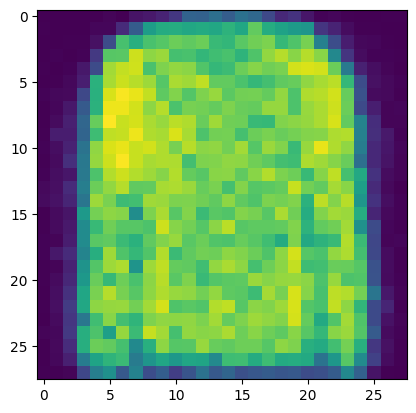

In [9]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

#1. Add one more hidden layer to autoencoder

In [10]:
# this is our input placeholder
input_img = Input(shape=(784,))
#Adding hidden layer to encoding
hiddenLayer_en=Dense(512,activation='relu')(input_img)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(hiddenLayer_en) #Undercomplete Encoding
#Adding hidden layer to decoding
hiddenLayer_de=Dense(512,activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(hiddenLayer_de)


# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#Fitting/training the model
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 5s 6ms/step - loss: 0.3243 - accuracy: 0.0138 - val_loss: 0.2942 - val_accuracy: 0.0201
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2867 - accuracy: 0.0211 - val_loss: 0.2848 - val_accuracy: 0.0211
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2805 - accuracy: 0.0262 - val_loss: 0.2820 - val_accuracy: 0.0273
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2774 - accuracy: 0.0296 - val_loss: 0.2789 - val_accuracy: 0.0300
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2755 - accuracy: 0.0327 - val_loss: 0.2769 - val_accuracy: 0.0344


#2. Do the prediction on the test data and then visualize the reconstructed version of that test data. Also, visualize the same test data before reconstruction using Matplotlib

In [11]:
#predicting on the test data
prediction = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


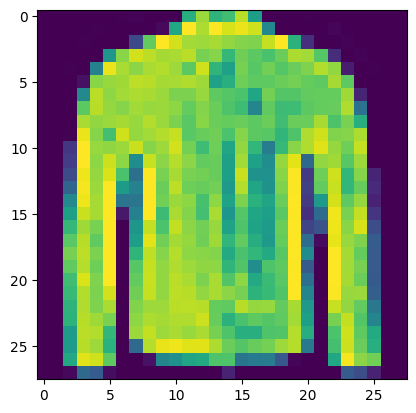

In [12]:
#Input Image
from matplotlib import pyplot as plt
plt.imshow(x_test[50].reshape(28,28))
plt.show()

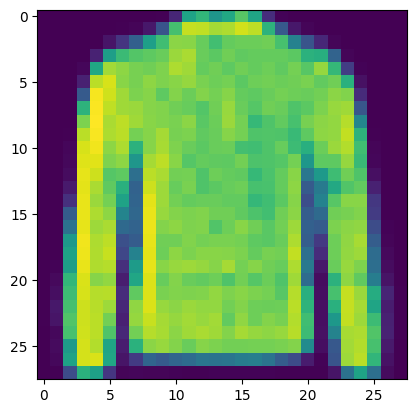

In [13]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()